In [1]:
# Fazendo a conexão com o Google Drive.
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install lazypredict


#**Importando as bibliotecas**

In [3]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from scipy.stats import chi2_contingency

from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, accuracy_score,confusion_matrix, recall_score
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB




#**Carregando os dados**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/dataframe_2.csv', sep = ',')

#**Dicionário dos dados**

In [5]:
# Dicionário dos dados

'''
1) V0001 - Unidade da Federação
2) V0026 - Tipo de situação censitária
3) C006 - Sexo
4) C008 - Idade
5) C009 - Cor ou Raça
6) D001 - Se sabe ler ou escrever
7) D00901 - Escolaridade
8) N004 - Quando o(a) Sr(a) sobe uma ladeira, um lance de escadas
ou caminha rápido no plano, sente dor ou desconforto no peito ?
9) N005 - Quando o(a) Sr(a) caminha em lugar plano, em velocidade
normal, sente dor ou desconforto no peito
10) N010 - Nas duas últimas semanas, com que frequência o(a) Sr(a)
teve problemas no sono, como dificuldade para adormecer, acordar
frequentemente à noite ou dormir mais do que de costume?
11) N011 - Nas duas últimas semanas, com que frequência o(a) Sr(a)
teve problemas por não se sentir descansado(a) e disposto(a) durante o
dia, sentindo-se cansado(a), sem ter energia ?
12) P00104 - Peso
13) P00404 - Altura
14) P01001 - Em geral, o(a) Sr(a) costuma comer esse tipo de verdura ou
legume:
15) P019 - Em geral, quantas vezes por dia o(a) Sr(a) come frutas?
16) P02002 - Em quantos dias da semana o(a) Sr(a) costuma tomar
refrigerante?
17) P02102 - Que tipo de refrigerante o(a) Sr(a) costuma tomar?
18) P034 - Nos últimos três meses, o(a) Sr(a) praticou algum tipo de
exercício físico ou esporte?
19) P035 - Quantos dias por semana o(a) Sr(a) costuma
(costumava)praticar exercício físico ou esporte?
20) P038 - No seu trabalho, o(a) Sr(a) anda bastante a pé?
21) P039 - No seu trabalho, o(a) Sr(a) faz faxina pesada, carrega peso
ou faz outra atividade pesada que requer esforço físico intenso?
22) P03905 - Em um dia normal, quanto tempo o(a) Sr(a) passa andando
bastante a pé ou realizando essas atividades pesadas ou que requerem
esforço físico no seu trabalho?Horas
23) P040 - Para ir ou voltar do trabalho, o(a) Sr(a) faz algum trajeto a pé
ou de bicicleta?
24) P050 - Atualmente, o(a) Sr(a) fuma algum produto do tabaco?
25) P051 - E no passado, o(a) Sr(a) fumou algum produto do tabaco
diariamente?
26) P05402 - Quantos por dia de tabaco o senhor fumava?
27) Q00201 - Algum médico já lhe deu o diagnóstico de hipertensão
arterial (pressão alta)?
28) Q03001 - Algum médico já lhe deu o diagnóstico de diabetes?
29) Q060 - Algum médico já lhe deu o diagnóstico de colesterol alto?
30) Q06306 - Algum médico já lhe deu o diagnóstico de uma doença do
coração, tal como infarto, angina, insuficiência cardíaca ou outra?
31) Q068 - Algum médico já lhe deu o diagnóstico de AVC (Acidente
Vascular Cerebral) ou derrame?
32) Q124 - Algum médico já lhe deu o diagnóstico de insuficiência
renal crônica?
33) P02602 - Em quantos dias da semana o(a) Sr(a) costuma substituir a
refeição do almoço por lanches rápidos como sanduíches, salgados,
pizza, cachorro quente, etc?
34) P02601- Considerando a comida preparada na hora e os alimentos
industrializados, o(a) Sr(a) acha que o seu consumo de sal é
'''

'\n1) V0001 - Unidade da Federação\n2) V0026 - Tipo de situação censitária\n3) C006 - Sexo\n4) C008 - Idade\n5) C009 - Cor ou Raça\n6) D001 - Se sabe ler ou escrever\n7) D00901 - Escolaridade\n8) N004 - Quando o(a) Sr(a) sobe uma ladeira, um lance de escadas\nou caminha rápido no plano, sente dor ou desconforto no peito ?\n9) N005 - Quando o(a) Sr(a) caminha em lugar plano, em velocidade\nnormal, sente dor ou desconforto no peito\n10) N010 - Nas duas últimas semanas, com que frequência o(a) Sr(a)\nteve problemas no sono, como dificuldade para adormecer, acordar\nfrequentemente à noite ou dormir mais do que de costume?\n11) N011 - Nas duas últimas semanas, com que frequência o(a) Sr(a)\nteve problemas por não se sentir descansado(a) e disposto(a) durante o\ndia, sentindo-se cansado(a), sem ter energia ?\n12) P00104 - Peso\n13) P00404 - Altura\n14) P01001 - Em geral, o(a) Sr(a) costuma comer esse tipo de verdura ou\nlegume:\n15) P019 - Em geral, quantas vezes por dia o(a) Sr(a) come frut

#**Análise exploratória e pré-processamento**

In [6]:
# Verificando o tamanho da base.
print("A base possui",len(df), "Registros")

A base possui 279382 Registros


In [7]:
df.head(2)

,V0001,V0026,C006,C008,C009,D001,D00901,N004,N005,N010,...,P051,P05402,Q060,Q00201,Q03001,Q06306,Q068,Q124,P02602,P02601
0,Rondônia,Urbano,Mulher,55,Branca,Sim,Antigo primário (elementar),Não,Não,Quase todos dias,...,NaN,NaN,Sim,Sim,Não,Não,Não,Não,0.00,Adequado
1,Rondônia,Urbano,Homem,69,Parda,Sim,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Verificando a quantidade de Não, Sim e null para valores referente a hipertensao.

value_counts = df['Q00201'].value_counts(dropna=False)

print("Sim: ", value_counts[2])
print("Não: ", value_counts[1])
print("Nan: ", value_counts[0])

print("Ao todo a base possui", value_counts[2] + value_counts[1], "registros que podem ser trabalhados")


Sim:  23851
Não:  64885
Nan:  190646
Ao todo a base possui 88736 registros que podem ser trabalhados


In [9]:
# Removendo os Null da variável hipertensão.
df = df.dropna(subset=['Q00201'])

print("O novo tamanho do df é:", len(df))

O novo tamanho do df é: 88736


In [10]:
# Criando a variavel região.

# Dicionário de mapeamento dos estados para as regiões
regioes = {
    'Acre': 'Norte','Alagoas': 'Nordeste','Amapá': 'Norte','Amazonas': 'Norte','Bahia': 'Nordeste','Ceará': 'Nordeste','Distrito Federal': 'Centro-Oeste','Espírito Santo': 'Sudeste','Goiás': 'Centro-Oeste','Maranhão': 'Nordeste',
    'Mato Grosso': 'Centro-Oeste','Mato Grosso do Sul': 'Centro-Oeste','Minas Gerais': 'Sudeste','Pará': 'Norte','Paraíba': 'Nordeste','Paraná': 'Sul','Pernambuco': 'Nordeste','Piauí': 'Nordeste',
    'Rio de Janeiro': 'Sudeste','Rio Grande do Norte': 'Nordeste','Rio Grande do Sul': 'Sul','Rondônia': 'Norte','Roraima': 'Norte','Santa Catarina': 'Sul','São Paulo': 'Sudeste','Sergipe': 'Nordeste',
    'Tocantins': 'Norte'
}


# Função para mapear o estado para a região
def obter_regiao(estado):
    return regioes.get(estado)

# Criando a nova coluna 'Região' aplicando a função map
df['Região'] = df['V0001'].map(obter_regiao)


In [11]:
# Criando a variável IMC

df['P00404'] = df['P00404']/100

df['IMC'] = df['P00104'] / (df['P00404'] ** 2)

In [12]:
# Renomeando as colunas para nomes mais compreensíveis.

colunas = ['Estado', 'situação censitária', 'Sexo', 'Idade','Cor','Sabe Ler?','Escolaridade', 'Sente dor no peito em ladeiras/escada?',
'Sente dor no peito em lugares planos?', 'Problemas do sono', 'cansaço', 'Peso', 'Altura','Come legumes?','Come Frutas?','Toma refri(Freq)?','Que tipo de refri?', 'Pratica esporte?',
'Quantos dias na semana pratica esporte?', 'Anda no trabalho?', 'O trabalho é pesado fisicamente?', 'Tempo realizando atv fisica no trabalho', 'Vai de bike ou a pé para o trabalho?',
'Fuma tabaco?', 'Fumou mes passado diariamente?', 'Fuma qts cigarros por dia em media', 'Fuma quantos por dia','Hipertenso', 'Diabetes','Colesterol Alto', 'Doença do coracao',
'AVC', 'Insuficiencia Renal', 'Consumo.Ali.Indu']

df = df.rename(columns=dict(zip(df.columns, colunas)))

In [13]:
df.head(2)

,Estado,situação censitária,Sexo,Idade,Cor,Sabe Ler?,Escolaridade,Sente dor no peito em ladeiras/escada?,Sente dor no peito em lugares planos?,Problemas do sono,...,Fuma quantos por dia,Hipertenso,Diabetes,Colesterol Alto,Doença do coracao,AVC,Insuficiencia Renal,Consumo.Ali.Indu,Região,IMC
0,Rondônia,Urbano,Mulher,55,Branca,Sim,Antigo primário (elementar),Não,Não,Quase todos dias,...,Sim,Sim,Não,Não,Não,Não,0.00,Adequado,Norte,28.54
9,Rondônia,Urbano,Mulher,19,Parda,Sim,Regular do ensino médio ou do 2º grau,Não,Não,Nenhum dia,...,Não,Não,Não,Não,Não,Não,0.00,Adequado,Norte,28.13


In [14]:
# Removendo as colunas estado, peso e altura, pois sao correlacionadas com as colunas regiao e imc

df = df.drop(columns=['Estado', 'Altura', 'Peso'])

In [15]:
# Verificando todas as variáveis com NA

df.isna().sum().sort_values(ascending=False)

Fumou mes passado diariamente?             87608
Fuma qts cigarros por dia em media         81845
Tempo realizando atv fisica no trabalho    63792
Quantos dias na semana pratica esporte?    53189
Come Frutas?                               48949
Que tipo de refri?                         48776
Come legumes?                              42666
Anda no trabalho?                          37081
Vai de bike ou a pé para o trabalho?       37081
O trabalho é pesado fisicamente?           37081
Escolaridade                               13248
Fuma quantos por dia                        6555
Diabetes                                    5440
Sente dor no peito em ladeiras/escada?      1877
Sente dor no peito em lugares planos?       1877
IMC                                          882
Sexo                                           0
Idade                                          0
Região                                         0
Consumo.Ali.Indu                               0
Insuficiencia Renal 

In [16]:
# Serão removidas as variáveis: 'Fumou mes passado diariamente?' e 'Fuma qts cigarros por dia em media' devido as suas quantidades de nulos

df = df.drop(columns=['Fumou mes passado diariamente?', 'Fuma qts cigarros por dia em media'])

In [17]:
# Verificando a distribuiçã ode frequência de todas as colunas
for col in df.columns:
    value_counts = df[col].value_counts(dropna=False)
    print("Coluna:", col)
    print(value_counts)
    print()

Coluna: situação censitária
Urbano    68499
Rural     20237
Name: situação censitária, dtype: int64

Coluna: Sexo
Mulher    47371
Homem     41365
Name: Sexo, dtype: int64

Coluna: Idade
37     1952
39     1868
36     1850
35     1792
38     1778
       ... 
99        6
100       5
104       3
102       1
107       1
Name: Idade, Length: 91, dtype: int64

Coluna: Cor
Parda       44800
Branca      32516
Preta       10087
Amarela       666
Indígena      657
Ignorado       10
Name: Cor, dtype: int64

Coluna: Sabe Ler?
Sim    79049
Não     9687
Name: Sabe Ler?, dtype: int64

Coluna: Escolaridade
Regular do ensino médio ou do 2º grau                                    24235
Regular do ensino fundamental ou do 1º grau                              18987
NaN                                                                      13248
Superior – graduação                                                     10356
Antigo primário (elementar)                                               9881
Especia

In [18]:
# Transformando as variáveis qualitativas em quantitativas.

# Selecionar apenas as colunas não numéricas
cols_to_encode = df.select_dtypes(exclude='number').columns

# Criar um dicionário para armazenar os mapeamentos
label_dict = {}

# Iterar sobre as colunas selecionadas e aplicar o LabelEncoder
for col in cols_to_encode:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_dict[col] = {label: category for label, category in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# Exibir o dicionário resultante
print(label_dict)

{'situação censitária': {'Rural': 0, 'Urbano': 1}, 'Sexo': {'Homem': 0, 'Mulher': 1}, 'Cor': {'Amarela': 0, 'Branca': 1, 'Ignorado': 2, 'Indígena': 3, 'Parda': 4, 'Preta': 5}, 'Sabe Ler?': {'Não': 0, 'Sim': 1}, 'Escolaridade': {'Alfabetização de jovens e adultos': 0, 'Antigo científico, clássico etc. (médio 2º ciclo)': 1, 'Antigo ginasial (médio 1º ciclo)': 2, 'Antigo primário (elementar)': 3, 'Classe de alfabetização – CA': 4, 'Creche': 5, 'Doutorado': 6, 'Educação de jovens e adultos (EJA) ou supletivo do ensino fundamental': 7, 'Educação de jovens e adultos (EJA) ou supletivo do ensino médio': 8, 'Especialização de nível superior (duração mínima de 360 horas)': 9, 'Mestrado': 10, 'Pré-escola': 11, 'Regular do ensino fundamental ou do 1º grau': 12, 'Regular do ensino médio ou do 2º grau': 13, 'Superior – graduação': 14, nan: 15}, 'Sente dor no peito em ladeiras/escada?': {'Não': 0, 'Sim': 1, nan: 2}, 'Sente dor no peito em lugares planos?': {'Não': 0, 'Sim': 1, nan: 2}, 'Problemas do

In [19]:
# Verificando a quantidade de hipertensos e não hipertensos

value_counts = df['Hipertenso'].value_counts(dropna=False)
print(value_counts[0], 'Não hipertenso')
print(value_counts[1], 'Hipertenso')


64885 Não hipertenso
23851 Hipertenso


In [20]:
# Preenchendo todos os null do dataset com -99

df.fillna(-99, inplace=True)

In [21]:
# Verificando a distribuição por sexo

value_counts = df['Sexo'].value_counts(dropna=False)
print(value_counts[1], 'Homens')
print(value_counts[0], 'Mulheres')


47371 Homens
41365 Mulheres


In [22]:
df.head(2)

,situação censitária,Sexo,Idade,Cor,Sabe Ler?,Escolaridade,Sente dor no peito em ladeiras/escada?,Sente dor no peito em lugares planos?,Problemas do sono,cansaço,...,Fuma quantos por dia,Hipertenso,Diabetes,Colesterol Alto,Doença do coracao,AVC,Insuficiencia Renal,Consumo.Ali.Indu,Região,IMC
0,1,1,55,1,1,3,0,0,3,1,...,1,1,0,0,0,0,0.00,0,2,28.54
9,1,1,19,4,1,13,0,0,2,2,...,0,0,0,0,0,0,0.00,0,2,28.13


In [23]:
# Verificando as colunas no dataset.

df.columns

Index(['situação censitária', 'Sexo', 'Idade', 'Cor', 'Sabe Ler?',
       'Escolaridade', 'Sente dor no peito em ladeiras/escada?',
       'Sente dor no peito em lugares planos?', 'Problemas do sono', 'cansaço',
       'Come legumes?', 'Come Frutas?', 'Toma refri(Freq)?',
       'Que tipo de refri?', 'Pratica esporte?',
       'Quantos dias na semana pratica esporte?', 'Anda no trabalho?',
       'O trabalho é pesado fisicamente?',
       'Tempo realizando atv fisica no trabalho',
       'Vai de bike ou a pé para o trabalho?', 'Fuma tabaco?',
       'Fuma quantos por dia', 'Hipertenso', 'Diabetes', 'Colesterol Alto',
       'Doença do coracao', 'AVC', 'Insuficiencia Renal', 'Consumo.Ali.Indu',
       'Região', 'IMC'],
      dtype='object')

In [24]:
# Utilizando o teste de Qui-Quadrado para verificar se
# existe dependencia entre a hipertensão e outras  doenças.
# Como p é muito baixo, existe uma forte associação (dependencia) entre a hipertensão e essas patologias

from scipy.stats import chi2_contingency

tabela_contingencia = pd.crosstab(df['Hipertenso'], df['Diabetes'])
chi2, p_value, _, _ = chi2_contingency(tabela_contingencia)
print("Qui-quadrado:", chi2)
print("Valor p:", p_value)

tabela_contingencia = pd.crosstab(df['Hipertenso'], df['Colesterol Alto'])
chi2, p_value, _, _ = chi2_contingency(tabela_contingencia)
print("Qui-quadrado:", chi2)
print("Valor p:", p_value)

tabela_contingencia = pd.crosstab(df['Hipertenso'], df['Doença do coracao'])
chi2, p_value, _, _ = chi2_contingency(tabela_contingencia)
print("Qui-quadrado:", chi2)
print("Valor p:", p_value)

tabela_contingencia = pd.crosstab(df['Hipertenso'], df['AVC'])
chi2, p_value, _, _ = chi2_contingency(tabela_contingencia)
print("Qui-quadrado:", chi2)
print("Valor p:", p_value)

Qui-quadrado: 6645.488116728639
Valor p: 0.0
Qui-quadrado: 3470.15154265622
Valor p: 0.0
Qui-quadrado: 1866.0486636514188
Valor p: 0.0
Qui-quadrado: 448.4969048102631
Valor p: 1.531905189574377e-99


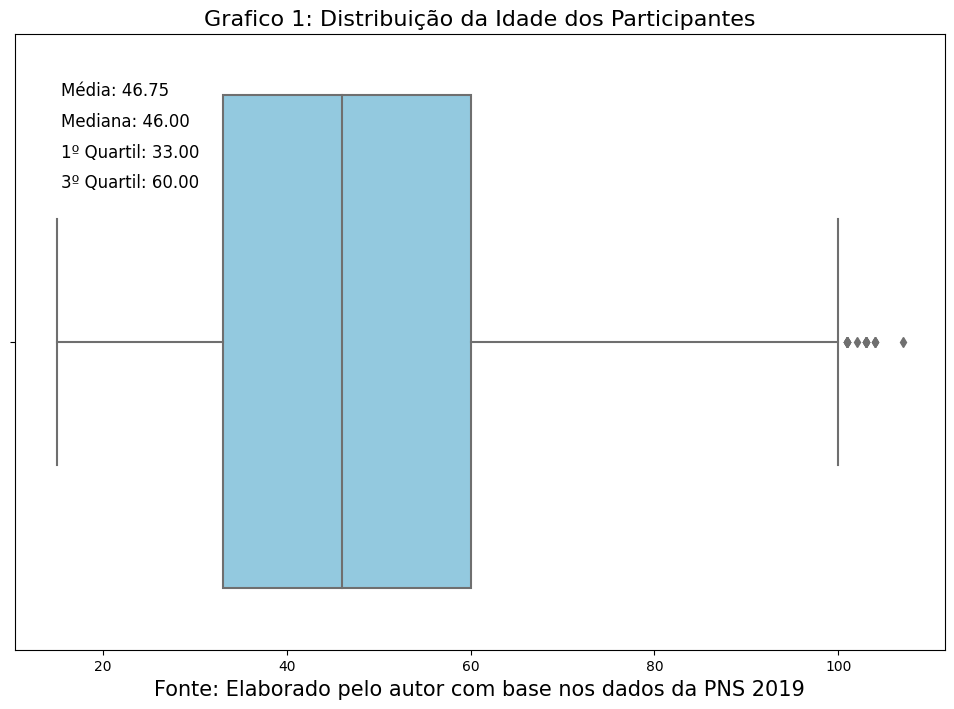

<Figure size 640x480 with 0 Axes>

In [25]:
# Verificando a idade dos participantes.

plt.figure(figsize=(12, 8)) # Define o tamanho da figura
sns.boxplot(x=df['Idade'], color='skyblue') # Cria o box plot com a coluna "idade"
plt.xlabel('Fonte: Elaborado pelo autor com base nos dados da PNS 2019', fontsize=15) # Define o rótulo do eixo x com um tamanho de fonte maior
plt.title('Grafico 1: Distribuição da Idade dos Participantes', fontsize=16) # Define o título do gráfico com um tamanho de fonte maior

descricao_idade = df['Idade'].describe()

plt.text(0.05, 0.9, f'Média: {descricao_idade["mean"]:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.85, f'Mediana: {descricao_idade["50%"]:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.8, f'1º Quartil: {descricao_idade["25%"]:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.75, f'3º Quartil: {descricao_idade["75%"]:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.show() # Exibe o gráfico
plt.savefig('boxplot_idade.png')

In [26]:
# Balanceando os dados por undersampling.


contagem_classes = df['Hipertenso'].value_counts()
min_observacoes = contagem_classes.min()

df_1 = df.groupby('Hipertenso').apply(lambda x: x.sample(min_observacoes)).reset_index(drop=True)

value_counts = df_1['Hipertenso'].value_counts(dropna=False)

print("Hipertensao:", value_counts[1])
print("Não Hipertensao:", value_counts[0])

Hipertensao: 23851
Não Hipertensao: 23851


In [27]:
# Testando o stepwise para verificar as melhores variaveis.

def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.10, verbose=True):
    included = list(initial_list)
    while True:
        changed = False

        # Variáveis candidatas a serem incluídas
        excluded = list(set(X.columns) - set(included))

        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]

        # variável com menor valor-p
        best_pval = new_pval.min()

        # Se o valor-p da melhor variável é menor que o threshold_in, entra no modelo
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Adicionado variável: {:30}  Valor-p: {:.4f}'.format(best_feature, best_pval))

        # Ajustando o modelo com as variaveis incluidas
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)

        # Variáveis candidatas a serem removidas
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()

        # Se o valor-p da pior variável é maior que o threshold_out, ele sai do modelo
        if worst_pval >= threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Removida variável: {:30}  Valor-p: {:.4f}'.format(worst_feature, worst_pval))

        if not changed:
            break

    return included

In [28]:
# Normalizando o dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Criando uma copia
df_1_normalizado = df_1.copy()

# Selecionando as colunas numericas
colunas_numericas = df_1.select_dtypes(include=['float64', 'int64']).columns

# Criando a instancia
scaler = StandardScaler()

# Aplicando a padronização
df_1_normalizado[colunas_numericas] = scaler.fit_transform(df_1[colunas_numericas])

In [29]:
df_1_normalizado.head(2)

,situação censitária,Sexo,Idade,Cor,Sabe Ler?,Escolaridade,Sente dor no peito em ladeiras/escada?,Sente dor no peito em lugares planos?,Problemas do sono,cansaço,...,Fuma quantos por dia,Hipertenso,Diabetes,Colesterol Alto,Doença do coracao,AVC,Insuficiencia Renal,Consumo.Ali.Indu,Região,IMC
0,0.54,0.90,-1.40,-1.23,0.38,0.54,-0.44,-0.29,0.25,0.40,...,-0.55,-1.00,-0.42,-0.29,-0.18,-0.14,-0.36,-0.79,-0.74,-0.07
1,0.54,-1.12,-1.91,-1.23,0.38,0.98,-0.44,-0.29,0.25,0.40,...,1.17,-1.00,-0.42,-0.29,-0.18,-0.14,-0.36,1.81,0.87,1.41


In [30]:
X = df_1.drop('Hipertenso', axis=1)
y = df_1['Hipertenso']

# Executar a seleção stepwise
selected_features = stepwise_selection(X, y)

# Imprimir as variáveis selecionadas
print('Variáveis selecionadas:')
print(selected_features)

Adicionado variável: Consumo.Ali.Indu                Valor-p: 0.0000
Adicionado variável: Escolaridade                    Valor-p: 0.0000
Adicionado variável: Idade                           Valor-p: 0.0000
Adicionado variável: Sente dor no peito em ladeiras/escada?  Valor-p: 0.0000
Adicionado variável: IMC                             Valor-p: 0.0000
Adicionado variável: Sexo                            Valor-p: 0.0000
Adicionado variável: Colesterol Alto                 Valor-p: 0.0000
Adicionado variável: Fuma quantos por dia            Valor-p: 0.0000
Adicionado variável: Doença do coracao               Valor-p: 0.0000
Adicionado variável: AVC                             Valor-p: 0.0000
Adicionado variável: Cor                             Valor-p: 0.0000
Adicionado variável: Fuma tabaco?                    Valor-p: 0.0000
Adicionado variável: Sente dor no peito em lugares planos?  Valor-p: 0.0000
Adicionado variável: cansaço                         Valor-p: 0.0000
Adicionado variável

In [31]:
variaveis_desejadas = ['Hipertenso','Anda no trabalho?', 'Escolaridade', 'Idade', 'Consumo.Ali.Indu', 'Sente dor no peito em ladeiras/escada?', 'IMC', 'Colesterol Alto', 'Sexo', 'Fuma quantos por dia', 'Doença do coracao', 'AVC', 'Fuma tabaco?', 'Cor', 'cansaço', 'Sente dor no peito em lugares planos?', 'situação censitária', 'Região', 'Come legumes?','Diabetes']
df_stepwise = df_1.loc[:, variaveis_desejadas]


num_colunas = df_stepwise.shape[1]
print("Quantidade de colunas:", num_colunas)

Quantidade de colunas: 20


#**Construindo o modelo**

In [32]:
# Testando a regressão logística com a seleção stepwise

X = df_stepwise.drop(['Hipertenso'], axis=1)
y = df_stepwise['Hipertenso'] # Variável target.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

model = LogisticRegression()
model.fit(X, y)

predictions = model.predict(X)
accuracy = accuracy_score(y, predictions)
print("Acurácia:", accuracy)

Acurácia: 0.7360907299484298


In [33]:
# df normalizado

# Crie uma cópia do DataFrame df_stepwise
df_stepwise_normalizado = df_stepwise.copy()

# Selecione as colunas numéricas do DataFrame
colunas_numericas = df_stepwise.select_dtypes(include=['float64', 'int64']).columns

# Crie uma instância do StandardScaler
scaler = StandardScaler()

# Aplique a padronização nas colunas numéricas
df_stepwise_normalizado[colunas_numericas] = scaler.fit_transform(df_stepwise[colunas_numericas])



In [34]:
# Teste com as variaveis do stepwise normalizado

X =df_stepwise_normalizado.drop(['Hipertenso'], axis=1)
y =df_stepwise_normalizado['Hipertenso'] # Variável target.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression()
model.fit(X, y)

predictions = model.predict(X)
accuracy = accuracy_score(y, predictions)
print("Acurácia:", accuracy)

Acurácia: 0.7453356253406566


In [35]:
# Coeficientes da regressão logística
coeficients = pd.DataFrame({'Variável': X.columns, 'Coeficiente': model.coef_[0]})
coeficients = coeficients.sort_values(by='Coeficiente', ascending=False)

# Ranking das variáveis mais importantes na logistica
ranking_variaveis = coeficients['Variável'].tolist()
ranking_variaveis

['Idade',
 'IMC',
 'Sente dor no peito em ladeiras/escada?',
 'Consumo.Ali.Indu',
 'Colesterol Alto',
 'Sexo',
 'Doença do coracao',
 'Fuma quantos por dia',
 'AVC',
 'Cor',
 'Anda no trabalho?',
 'Diabetes',
 'situação censitária',
 'Região',
 'Come legumes?',
 'Escolaridade',
 'cansaço',
 'Fuma tabaco?',
 'Sente dor no peito em lugares planos?']

In [36]:

# Aplicando os modelos com uma amostra de 8 mil , se por muitos dados, a memoria ram chega no limite
subset_size = 8000
df_stepwise_normalizado3  = df_stepwise_normalizado.sample(n=subset_size, random_state=1)

# Separar as variáveis de entrada (X) e a variável de saída (y)
X = df_stepwise_normalizado3.drop(['Hipertenso'], axis=1)
y = df_stepwise_normalizado3['Hipertenso']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Criar e treinar o LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Imprimir as acurácias dos modelos
print(models)

100%|██████████| 29/29 [00:20<00:00,  1.45it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.77               0.77     0.77      0.77   
LGBMClassifier                     0.77               0.77     0.77      0.77   
RandomForestClassifier             0.77               0.77     0.77      0.77   
SVC                                0.76               0.76     0.76      0.76   
NuSVC                              0.75               0.75     0.75      0.75   
LogisticRegression                 0.75               0.75     0.75      0.75   
ExtraTreesClassifier               0.75               0.75     0.75      0.75   
CalibratedClassifierCV             0.75               0.75     0.75      0.75   
LinearSVC                          0.75               0.75     0.75      0.75   
RidgeClassifier                    0.74               0.74     0.74      0.74   
LinearDiscriminantAnalysis  

In [37]:
df_stepwise_normalizado.head()

,Hipertenso,Anda no trabalho?,Escolaridade,Idade,Consumo.Ali.Indu,Sente dor no peito em ladeiras/escada?,IMC,Colesterol Alto,Sexo,Fuma quantos por dia,Doença do coracao,AVC,Fuma tabaco?,Cor,cansaço,Sente dor no peito em lugares planos?,situação censitária,Região,Come legumes?,Diabetes
0,-1.00,0.97,0.54,-1.40,-0.79,-0.44,-0.07,-0.29,0.90,-0.55,-0.18,-0.14,-0.35,-1.23,0.40,-0.29,0.54,-0.74,0.83,-0.42
1,-1.00,-0.17,0.98,-1.91,1.81,-0.44,1.41,-0.29,-1.12,1.17,-0.18,-0.14,-0.35,-1.23,0.40,-0.29,0.54,0.87,0.83,-0.42
2,-1.00,-0.17,-0.80,-0.38,-0.79,1.68,-0.07,-0.29,0.90,2.90,-0.18,-0.14,-0.35,1.28,1.78,2.19,-1.85,-1.54,-1.92,3.44
3,-1.00,0.97,-1.47,0.13,1.81,-0.44,0.15,-0.29,-1.12,-0.55,-0.18,-0.14,-0.35,0.65,0.40,-0.29,0.54,-0.74,-0.09,-0.42
4,-1.00,0.97,0.54,-1.80,0.94,-0.44,-0.35,-0.29,0.90,-0.55,-0.18,-0.14,-0.35,-1.23,-0.99,-0.29,0.54,0.07,-1.92,-0.42


In [38]:
# Definir a variável alvo
target = df_stepwise_normalizado['Hipertenso']

# Remover a variável alvo do dataframe
df_stepwise_normalizado.drop('Hipertenso', axis=1, inplace=True)

# Converter o dataframe em uma matriz numpy
X = df_stepwise_normalizado.values
y = target.values

# Função para calcular a especificidade
def specificity(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Criar um DataFrame para armazenar os resultados
resultados = pd.DataFrame(columns=['Modelo', 'Semente Aleatória', 'Acurácia', 'Sensibilidade', 'Especificidade', 'AUC-ROC'])

# Loop para variar a semente aleatória de 1 a 10
for seed in range(1, 11):
    # Dividir os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Regressão Logística
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    acc_lr = accuracy_score(y_test, y_pred_lr)
    sens_lr = recall_score(y_test, y_pred_lr)
    spec_lr = specificity(y_test, y_pred_lr)
    auc_lr = roc_auc_score(y_test, y_pred_lr)
    resultados = resultados.append({'Modelo': 'Regressão Logística', 'Semente Aleatória': seed, 'Acurácia': acc_lr, 'Sensibilidade': sens_lr, 'Especificidade': spec_lr, 'AUC-ROC': auc_lr}, ignore_index=True)

    # KNN
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)
    sens_knn = recall_score(y_test, y_pred_knn)
    spec_knn = specificity(y_test, y_pred_knn)
    auc_knn = roc_auc_score(y_test, y_pred_knn)
    resultados = resultados.append({'Modelo': 'KNN', 'Semente Aleatória': seed, 'Acurácia': acc_knn, 'Sensibilidade': sens_knn, 'Especificidade': spec_knn, 'AUC-ROC': auc_knn}, ignore_index=True)

    # Random Forest
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    sens_rf = recall_score(y_test, y_pred_rf)
    spec_rf = specificity(y_test, y_pred_rf)
    auc_rf = roc_auc_score(y_test, y_pred_rf)
    resultados = resultados.append({'Modelo': 'Random Forest', 'Semente Aleatória': seed, 'Acurácia': acc_rf, 'Sensibilidade': sens_rf, 'Especificidade': spec_rf, 'AUC-ROC': auc_rf}, ignore_index=True)

    # Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    acc_dt = accuracy_score(y_test, y_pred_dt)
    sens_dt = recall_score(y_test, y_pred_dt)
    spec_dt = specificity(y_test, y_pred_dt)
    auc_dt = roc_auc_score(y_test, y_pred_dt)
    resultados = resultados.append({'Modelo': 'Decision Tree', 'Semente Aleatória': seed, 'Acurácia': acc_dt, 'Sensibilidade': sens_dt, 'Especificidade': spec_dt, 'AUC-ROC': auc_dt}, ignore_index=True)


# Calcular a média e o desvio padrão das métricas por modelo
resultados_agrupados = resultados.groupby('Modelo').agg({'Acurácia': ['mean', 'std'], 'Sensibilidade': ['mean', 'std'], 'Especificidade': ['mean', 'std'], 'AUC-ROC': ['mean', 'std']})

# Exibir a tabela com os resultados
print(resultados_agrupados)

                    Acurácia      Sensibilidade      Especificidade       \
                        mean  std          mean  std           mean  std   
Modelo                                                                     
Decision Tree           0.66 0.00          0.66 0.00           0.66 0.01   
KNN                     0.70 0.00          0.68 0.01           0.71 0.01   
Random Forest           0.75 0.00          0.76 0.01           0.73 0.00   
Regressão Logística     0.75 0.00          0.74 0.01           0.75 0.00   

                    AUC-ROC       
                       mean  std  
Modelo                            
Decision Tree          0.66 0.00  
KNN                    0.70 0.00  
Random Forest          0.75 0.00  
Regressão Logística    0.75 0.00  


In [41]:
# df normalizado
from sklearn.preprocessing import StandardScaler

# Crie uma cópia do DataFrame df_stepwise
df_stepwise_normalizado = df_stepwise.copy()

# Selecione as colunas numéricas do DataFrame
colunas_numericas = df_stepwise.select_dtypes(include=['float64', 'int64']).columns

# Crie uma instância do StandardScaler
scaler = StandardScaler()

# Aplique a padronização nas colunas numéricas
df_stepwise_normalizado[colunas_numericas] = scaler.fit_transform(df_stepwise[colunas_numericas])

In [42]:


# Definir a variável alvo
target = df_stepwise_normalizado['Hipertenso']

# Remover a variável alvo do dataframe
df_stepwise_normalizado.drop('Hipertenso', axis=1, inplace=True)

# Criar o objeto do modelo Random Forest
rf = RandomForestClassifier()

# Treinar o modelo
rf.fit(df_stepwise_normalizado, target)

# Obter a importância das variáveis
importances = rf.feature_importances_

# Criar um dataframe com as variáveis e suas importâncias
feature_importances = pd.DataFrame({'Variável': df_stepwise_normalizado.columns, 'Importância': importances})

# Ordenar as variáveis por importância
feature_importances = feature_importances.sort_values(by='Importância', ascending=False)

# Exibir a ordem das variáveis mais importantes
print(feature_importances)

                                  Variável  Importância
2                                    Idade         0.28
5                                      IMC         0.20
1                             Escolaridade         0.09
16                                  Região         0.06
3                         Consumo.Ali.Indu         0.05
0                        Anda no trabalho?         0.04
13                                 cansaço         0.04
12                                     Cor         0.04
17                           Come legumes?         0.04
8                     Fuma quantos por dia         0.03
18                                Diabetes         0.02
7                                     Sexo         0.02
15                     situação censitária         0.02
4   Sente dor no peito em ladeiras/escada?         0.02
11                            Fuma tabaco?         0.02
6                          Colesterol Alto         0.01
14   Sente dor no peito em lugares planos?      